In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data/WFH_WFO_dataset.csv")
data.head()

,ID,Name,Age,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [3]:
# Check for null values

data.isnull().sum()

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_office_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

## Pre-processing

In [4]:
data2 = data.copy()

In [5]:
# Bin ages

data2['Age_group'] = pd.cut(x=data2['Age'], bins=[20, 29, 39, 49, 59], labels=["20s", "30s", "40s", "50s"])
age_group_dummies = pd.get_dummies(data2.Age_group)
data2 = pd.concat([data2, age_group_dummies], axis=1)
data2.drop(["Age", "Age_group"], axis=1, inplace=True)
data2.head()

,ID,Name,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,...,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,20s,30s,40s,50s
0,1,Bhavana,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,...,5,Yes,5,5,Yes,1,0,0,1,0
1,2,Harry,Tutor,Male,No,No,No,No,No,CALMER,...,2,No,3,3,No,1,1,0,0,0
2,3,Banditaa,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,...,4,No,5,3,No,1,0,0,0,1
3,4,Neetha,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,...,4,No,4,5,Yes,0,1,0,0,0
4,5,Ram,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,...,5,Yes,4,2,Yes,1,1,0,0,0


In [6]:
# Get dummy values for gender and calmer_stressed columns

gender = pd.get_dummies(data['Gender'], drop_first=True)
calm_stress = pd.get_dummies(data['calmer_stressed'], drop_first=True)
data2 = pd.concat([data2, gender, calm_stress], axis=1)
data2.drop(['Gender', 'calmer_stressed'], axis=1, inplace=True)
data2.head()

,ID,Name,Occupation,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,...,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,20s,30s,40s,50s,Male,STRESSED
0,1,Bhavana,Tutor,Yes,Yes,Yes,Yes,Yes,5,1,...,5,5,Yes,1,0,0,1,0,0,0
1,2,Harry,Tutor,No,No,No,No,No,2,2,...,3,3,No,1,1,0,0,0,1,0
2,3,Banditaa,HR,Yes,Yes,Yes,Yes,Yes,3,3,...,5,3,No,1,0,0,0,1,0,0
3,4,Neetha,Engineer,Yes,No,Yes,Yes,No,3,4,...,4,5,Yes,0,1,0,0,0,0,1
4,5,Ram,Recruiter,Yes,No,No,Yes,No,3,3,...,4,2,Yes,1,1,0,0,0,1,1


In [7]:
# One-hot occupation (only 7 categories so can afford to do so)

occupation_dummies = pd.get_dummies(data2.Occupation)
data2 = pd.concat([data2, occupation_dummies], axis=1)
data2.drop("Occupation", axis=1, inplace=True)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,Yes,Yes,Yes,Yes,Yes,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,No,No,No,No,No,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,Yes,Yes,Yes,Yes,Yes,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,Yes,No,Yes,Yes,No,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,Yes,No,No,Yes,No,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [8]:
# Map Yes to 1 and No to 0

categorical =  ['Same_office_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data2[categorical] = data2[categorical].apply(binary_map)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,1.0,1,1,1,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,0.0,0,0,0,0,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,1.0,1,1,1,1,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,1.0,0,1,1,0,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,1.0,0,0,1,0,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [9]:
# Convert Same_office_home_location and RM_job_opportunities columns to integers

data2 = data2.dropna(subset=['Same_office_home_location','RM_job_opportunities'])
data2['Same_office_home_location'] = data2['Same_office_home_location'].astype(int)
data2['RM_job_opportunities'] = data2['RM_job_opportunities'].astype(int)
data2.head()

,ID,Name,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,Bhavana,1,1,1,1,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,2,Harry,0,0,0,0,0,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,Banditaa,1,1,1,1,1,3,3,4,...,1,0,0,0,0,1,0,0,0,0
3,4,Neetha,1,0,1,1,0,3,4,4,...,0,0,1,0,1,0,0,0,0,0
4,5,Ram,1,0,0,1,0,3,3,5,...,0,1,1,0,0,0,0,0,1,0


In [10]:
# Make analysis more granular

wfh_yes = data2[data2.Target == 1].copy()
wfh_no = data2[data2.Target == 0].copy()

In [11]:
# Drop ID and Name and Target

wfh_yes.drop(["ID", "Name", "Target"], axis=1, inplace=True)
wfh_no.drop(["ID", "Name", "Target"], axis=1, inplace=True)
wfh_yes.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,50s,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor
0,1,1,1,1,1,5,1,5,1,5,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,2,2,2,0,3,...,0,1,0,0,0,0,0,0,0,1
2,1,1,1,1,1,3,3,4,0,5,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,3,3,5,1,4,...,0,1,1,0,0,0,0,0,1,0
11,0,0,1,1,1,4,3,4,0,3,...,0,1,0,0,1,0,0,0,0,0


## K-Means and Correlation Analysis

**WFH = Yes**

In [12]:
SSE = []
Diff = []

for i in range(1, 9):
    model_i = KMeans(n_clusters=i, random_state=100)
    model_i.fit(wfh_yes)
    SSE.append(model_i.inertia_)

for j in range(len(SSE)):
    if j > 0:
        Diff.append(-(SSE[j] - SSE[j-1]))
        
# Diff.index(max(Diff))

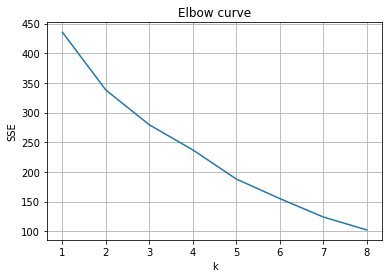

In [13]:
k = (range(1,9))
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k, SSE)
plt.show()

In [14]:
# Best K value = 2

km = KMeans(n_clusters = 2, random_state = 100)
km.fit(wfh_yes)

KMeans(n_clusters=2, random_state=100)

In [15]:
wfh_yes["cluster"] = km.labels_
wfh_yes.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor,cluster
0,1,1,1,1,1,5,1,5,1,5,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,2,2,2,0,3,...,1,0,0,0,0,0,0,0,1,1
2,1,1,1,1,1,3,3,4,0,5,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,3,3,5,1,4,...,1,1,0,0,0,0,0,1,0,1
11,0,0,1,1,1,4,3,4,0,3,...,1,0,0,1,0,0,0,0,0,1


In [16]:
cluster_dummies = pd.get_dummies(wfh_yes.cluster, prefix="Cluster")
wfh_yes = pd.concat([wfh_yes, cluster_dummies], axis=1)
wfh_yes.drop("cluster", axis=1, inplace=True)
wfh_yes.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor,Cluster_0,Cluster_1
0,1,1,1,1,1,5,1,5,1,5,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,2,2,2,0,3,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,1,1,3,3,4,0,5,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,1,0,3,3,5,1,4,...,1,0,0,0,0,0,1,0,0,1
11,0,0,1,1,1,4,3,4,0,3,...,0,0,1,0,0,0,0,0,0,1


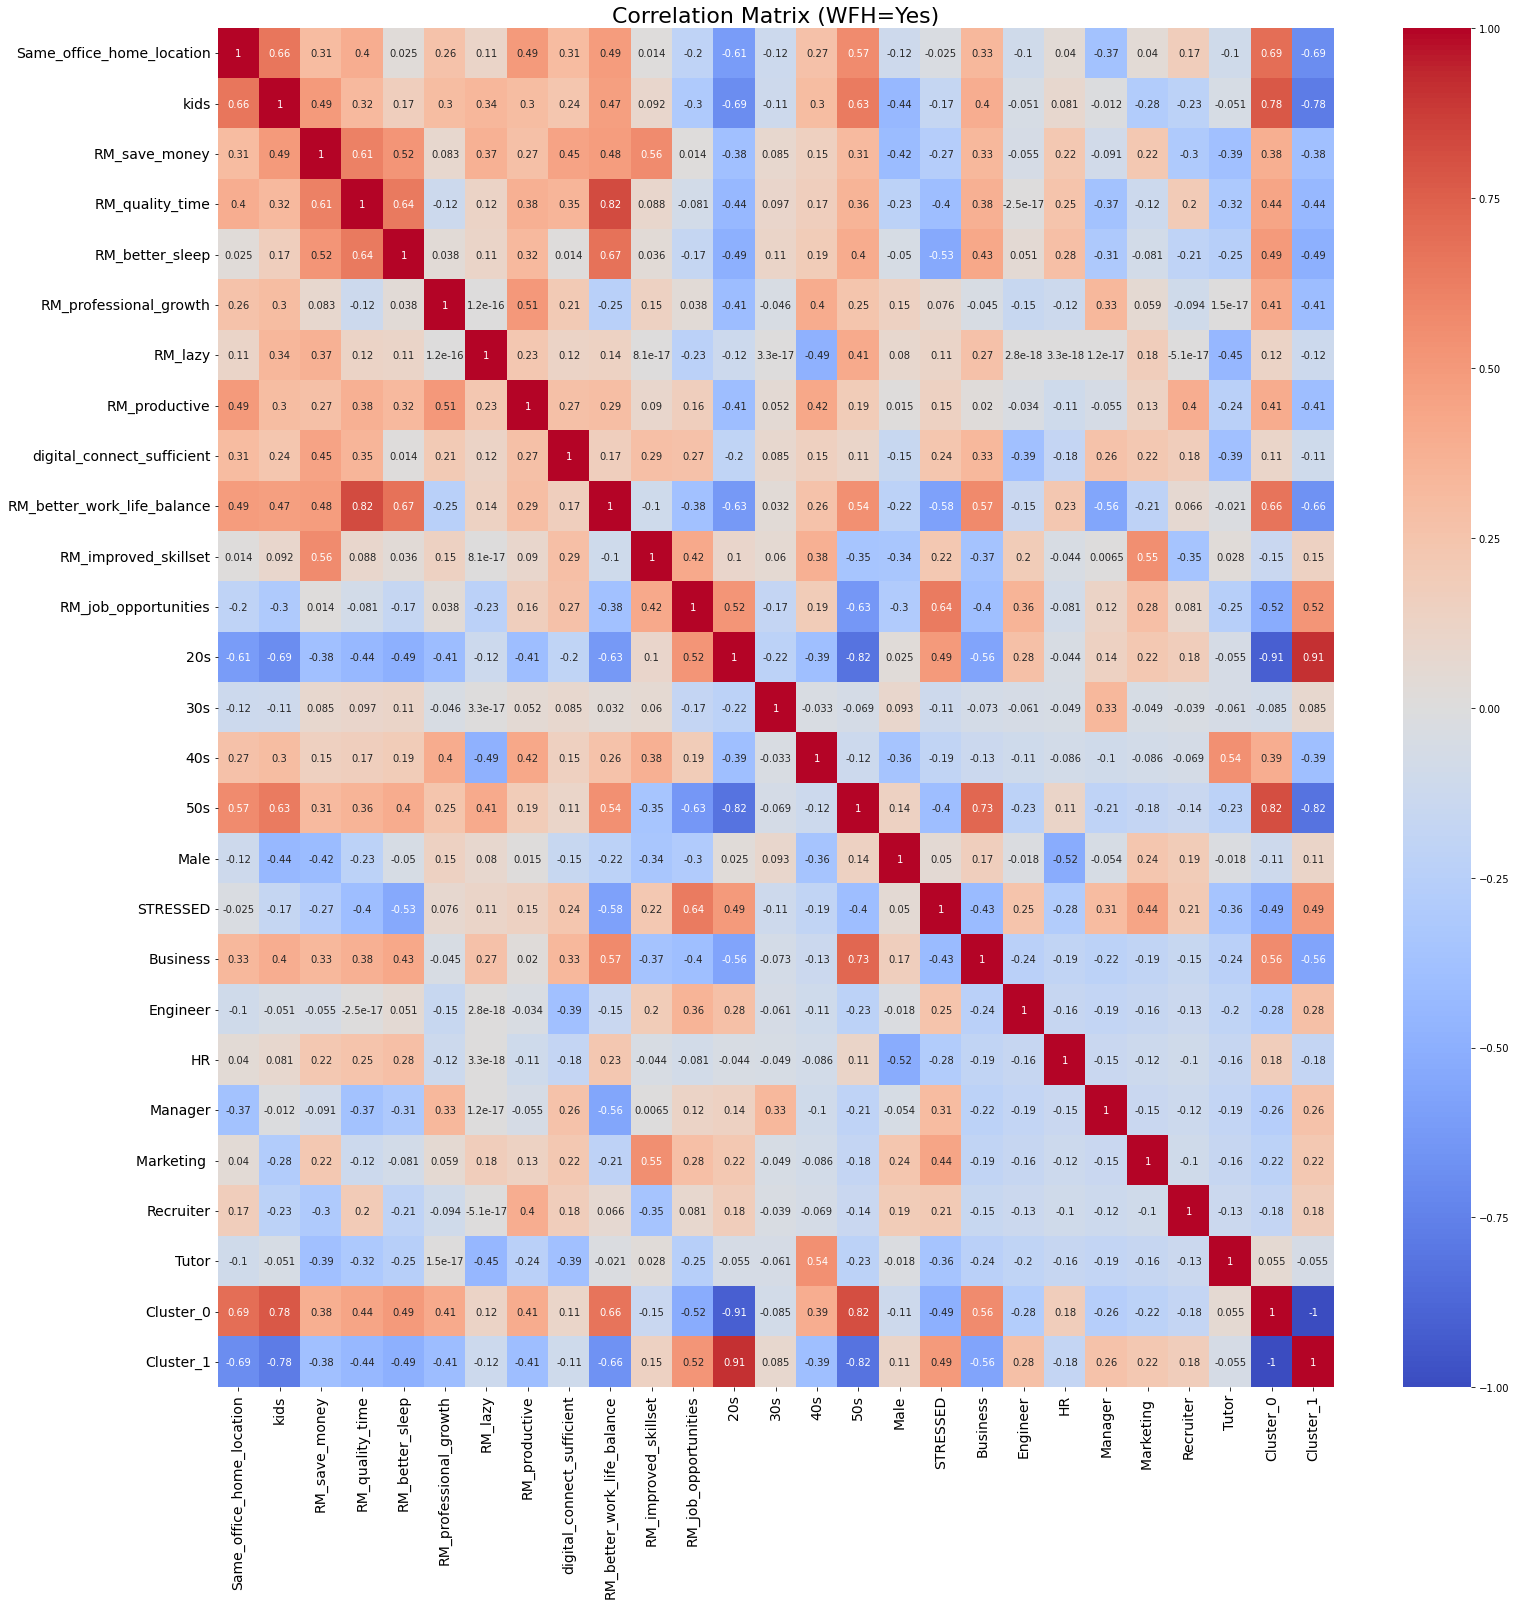

In [17]:
corr = wfh_yes.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (WFH=Yes)", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

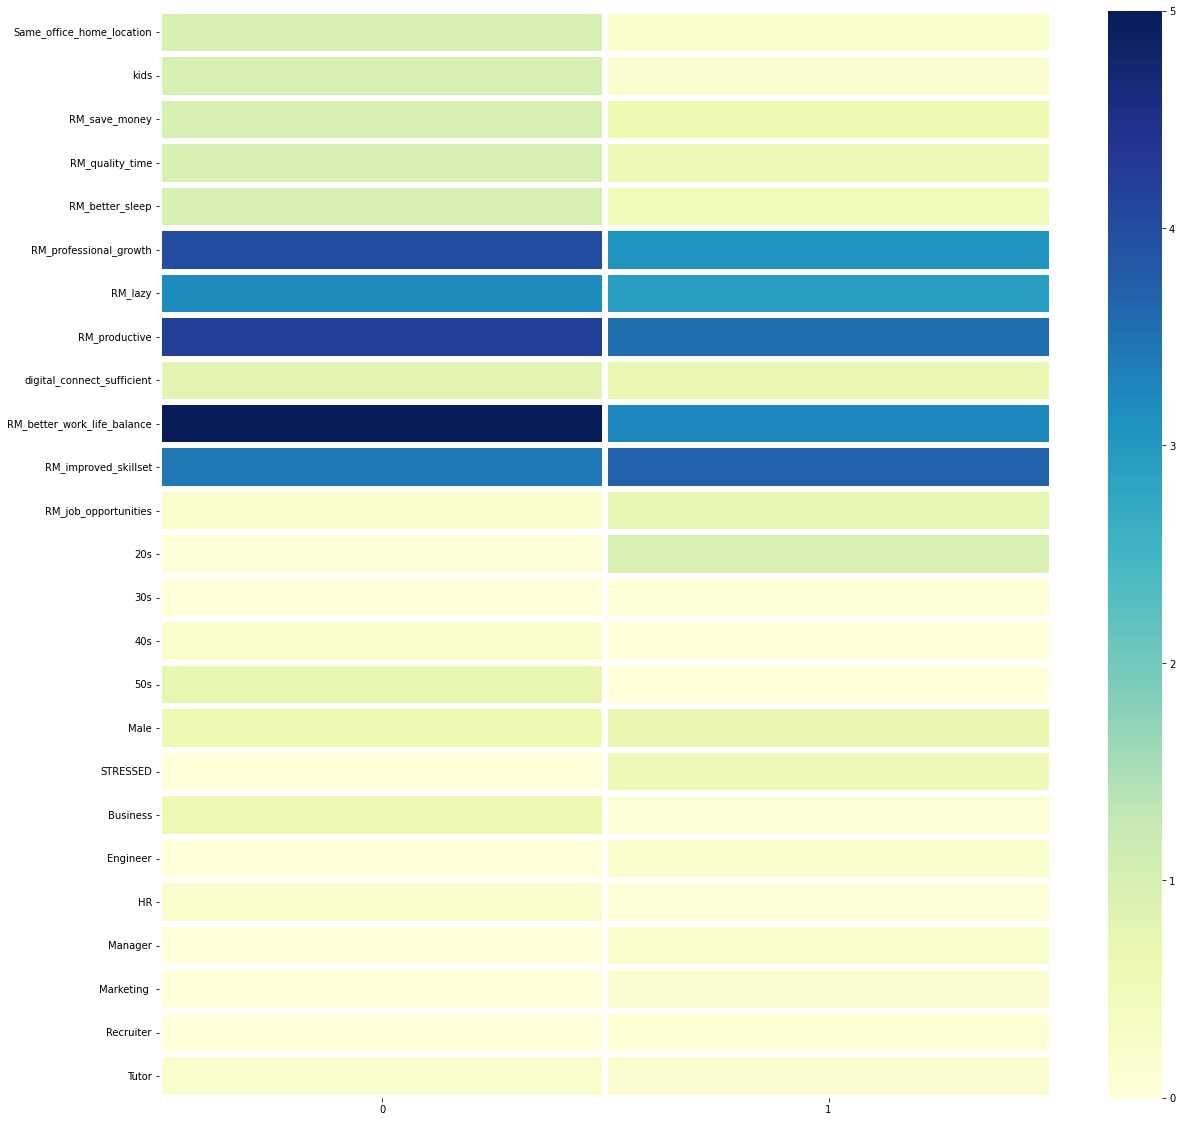

In [18]:
clust_means = pd.DataFrame(km.cluster_centers_, columns=wfh_yes.columns[:-2])
fig = plt.figure(figsize=(20, 20))
sns.heatmap(clust_means.T, linewidths=5, cmap="YlGnBu")
plt.show()

**WFH = No**

In [19]:
SSE = []
Diff = []

for i in range(1, 9):
    model_i = KMeans(n_clusters=i, random_state=100)
    model_i.fit(wfh_no)
    SSE.append(model_i.inertia_)

for j in range(len(SSE)):
    if j > 0:
        Diff.append(-(SSE[j] - SSE[j-1]))
        
# Diff.index(max(Diff))

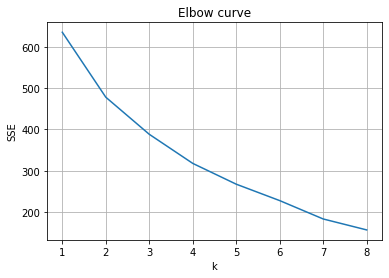

In [20]:
k = (range(1,9))
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.plot(k, SSE)
plt.show()

In [21]:
# Best K value = 2

km = KMeans(n_clusters = 2, random_state = 100)
km.fit(wfh_no)

KMeans(n_clusters=2, random_state=100)

In [22]:
wfh_no["cluster"] = km.labels_
wfh_no.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,Male,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor,cluster
3,1,0,1,1,0,3,4,4,0,4,...,0,1,0,1,0,0,0,0,0,1
5,0,0,1,1,1,3,3,3,0,3,...,1,0,0,0,0,0,0,1,0,1
10,1,0,1,1,0,4,4,4,0,4,...,0,1,0,1,0,0,0,0,0,1
14,1,0,1,1,0,4,4,4,0,4,...,0,1,1,0,0,0,0,0,0,1
17,0,0,0,1,0,1,5,2,0,3,...,1,1,1,0,0,0,0,0,0,1


In [23]:
cluster_dummies = pd.get_dummies(wfh_no.cluster, prefix="Cluster")
wfh_no = pd.concat([wfh_no, cluster_dummies], axis=1)
wfh_no.drop("cluster", axis=1, inplace=True)
wfh_no.head()

,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,...,STRESSED,Business,Engineer,HR,Manager,Marketing,Recruiter,Tutor,Cluster_0,Cluster_1
3,1,0,1,1,0,3,4,4,0,4,...,1,0,1,0,0,0,0,0,0,1
5,0,0,1,1,1,3,3,3,0,3,...,0,0,0,0,0,0,1,0,0,1
10,1,0,1,1,0,4,4,4,0,4,...,1,0,1,0,0,0,0,0,0,1
14,1,0,1,1,0,4,4,4,0,4,...,1,1,0,0,0,0,0,0,0,1
17,0,0,0,1,0,1,5,2,0,3,...,1,1,0,0,0,0,0,0,0,1


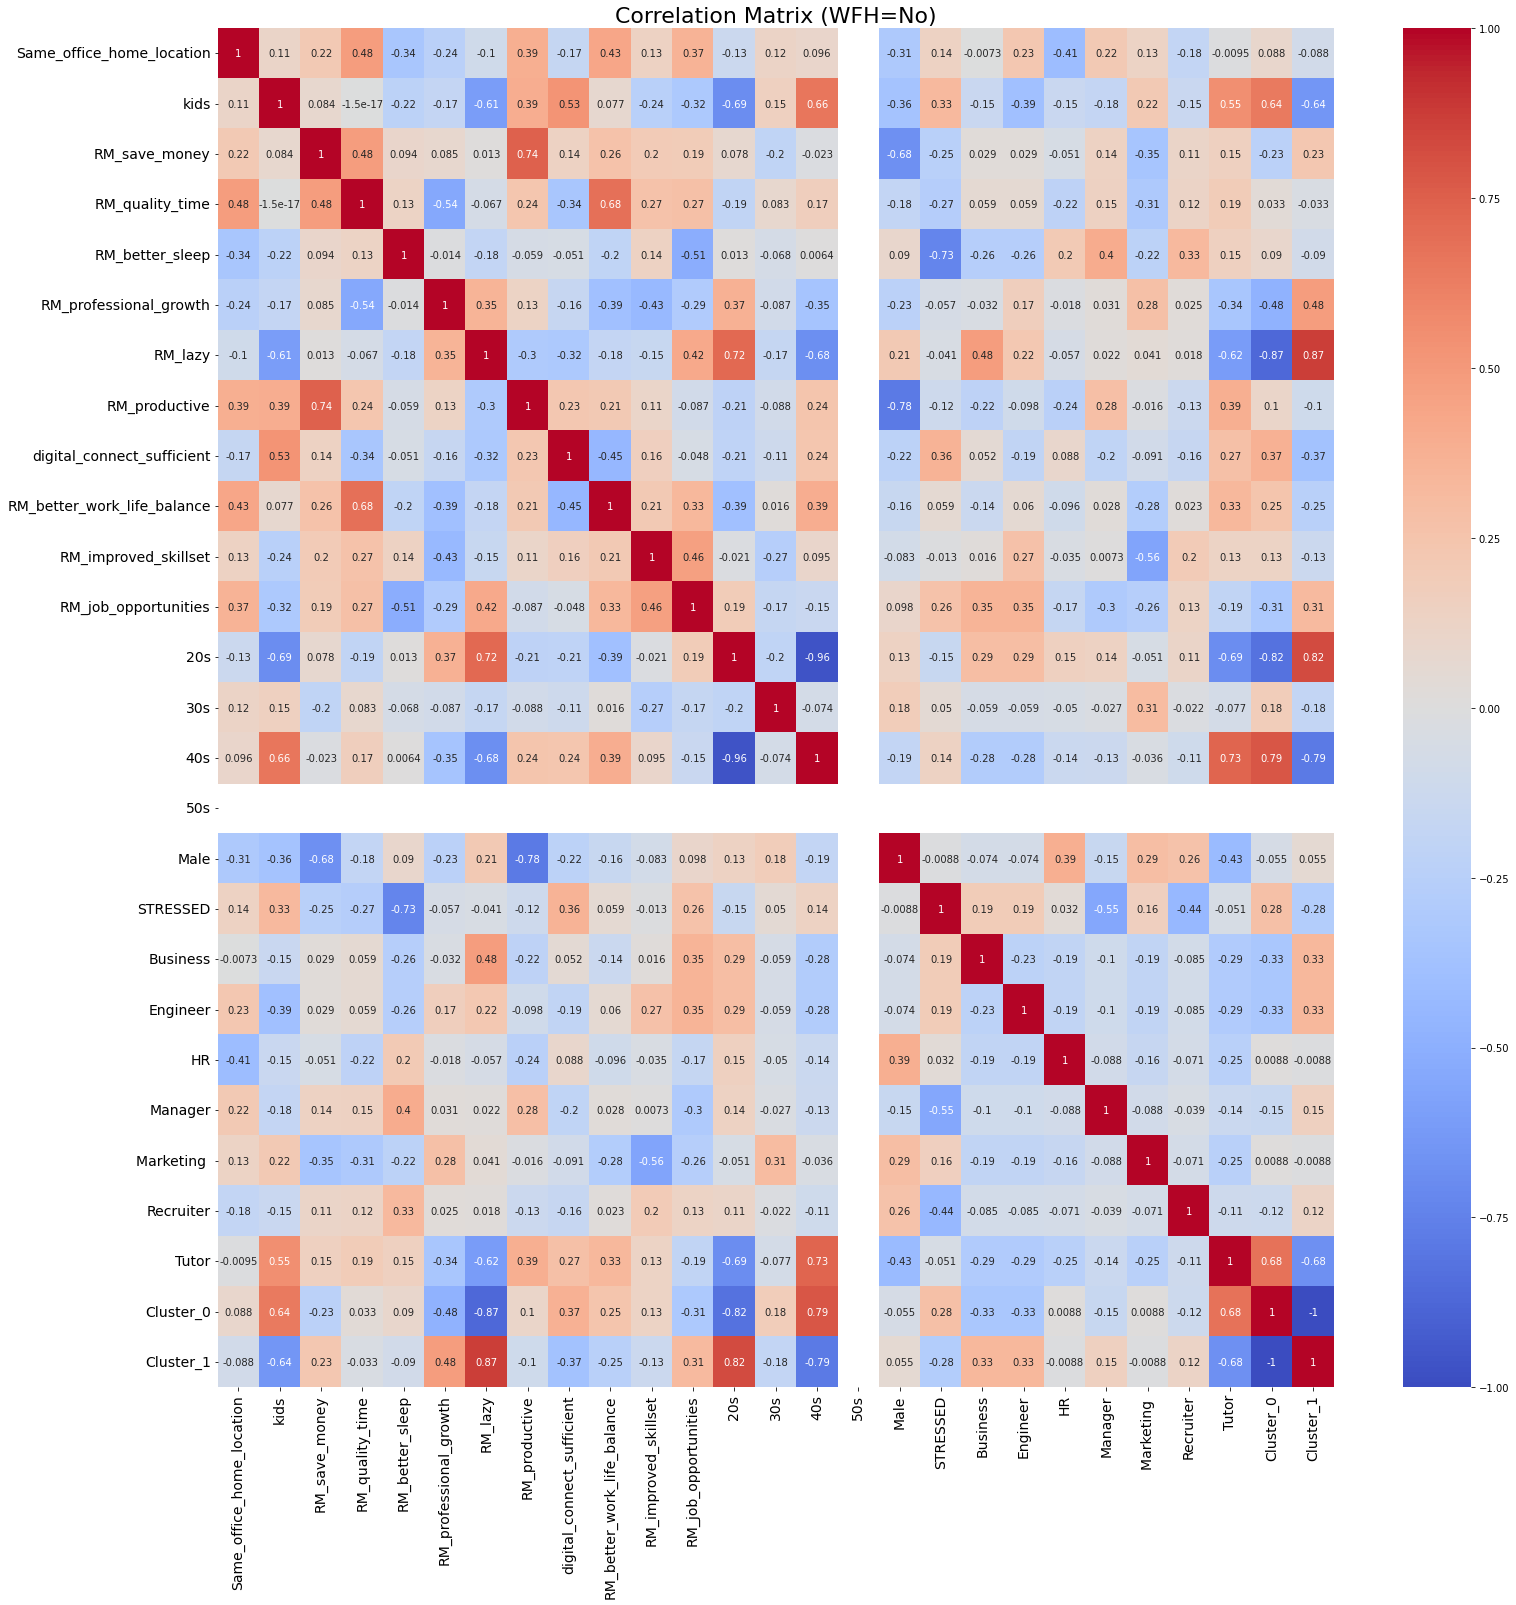

In [24]:
corr = wfh_no.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (WFH=No)", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

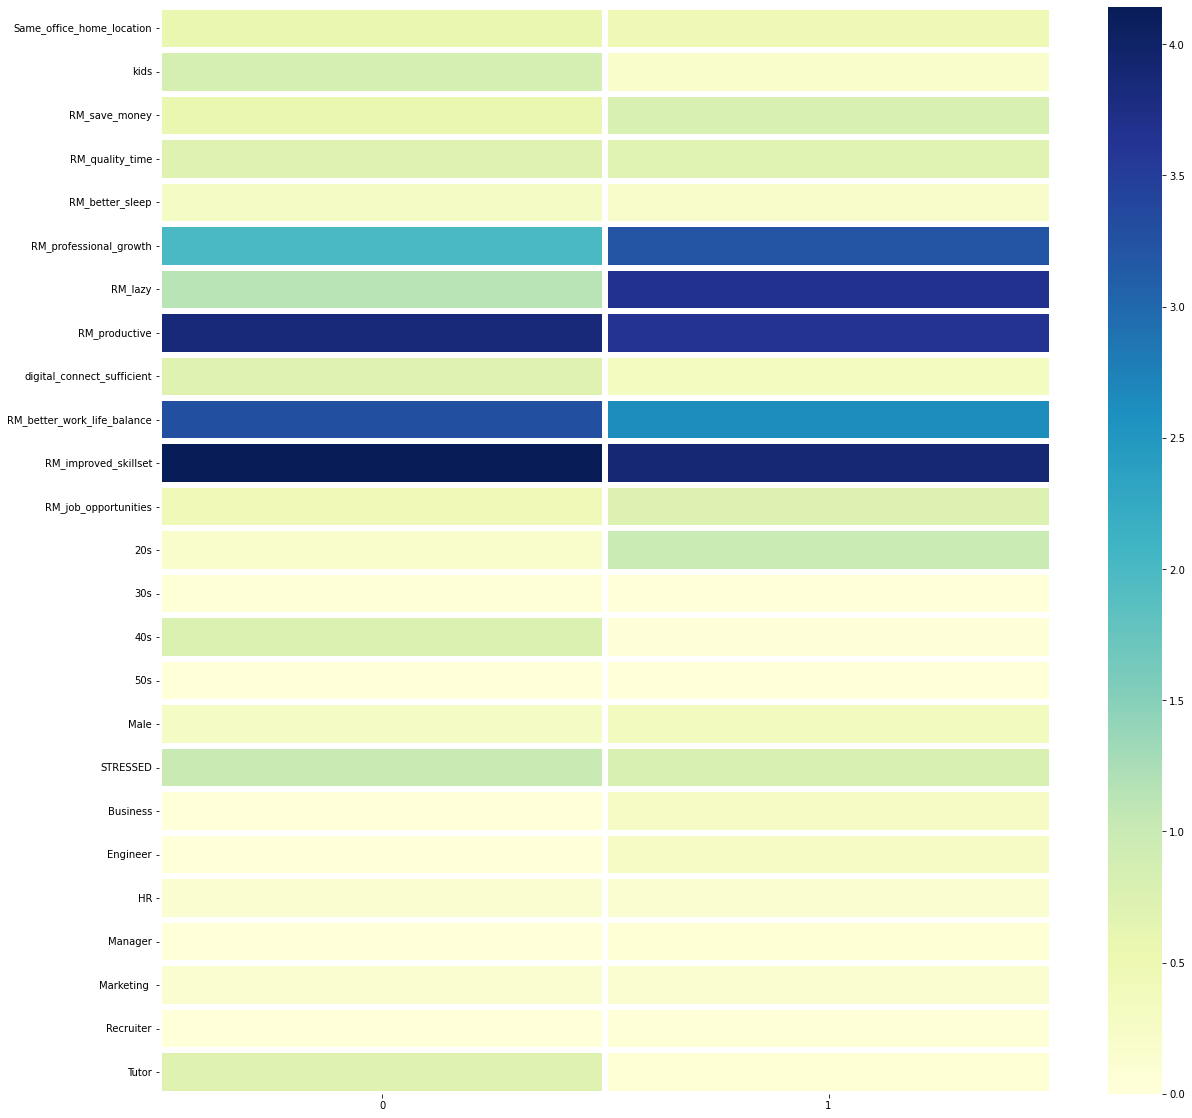

In [25]:
clust_means = pd.DataFrame(km.cluster_centers_, columns=wfh_no.columns[:-2])
fig = plt.figure(figsize=(20, 20))
sns.heatmap(clust_means.T, linewidths=5, cmap="YlGnBu")
plt.show()